In [1]:
import seaborn as sns

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# Data structures accepted by seaborn

데이터 시각화 라이브러리인 seaborn은 사용자가 데이터를 제공해야 합니다.

이 장에서는 그 작업을 수행하는 다양한 방법을 설명합니다.

Seaborn은 여러 가지 데이터 세트 형식을 지원하며, 대부분의 함수는 리스트나 딕셔너리와 같은 기본 제공 Python 유형뿐만 아니라 pandas 또는 numpy 라이브러리의 객체로 표현된 데이터를 받아들입니다.

이러한 다양한 옵션과 관련된 사용 패턴을 이해하면 거의 모든 데이터 집합에 대해 유용한 시각화를 신속하게 만드는 데 도움이 됩니다.

## Long-form vs. wide-form data

seaborn의 대부분의 플로팅 함수는 데이터의 벡터를 지향합니다.

x를 y에 대해 플롯할 때 각 변수는 벡터여야 합니다.

Seaborn은 표 형식으로 구성된 둘 이상의 벡터가 있는 데이터 집합을 허용합니다.

"long-form" 데이터 테이블과 "wide-form" 데이터 테이블에는 근본적인 차이가 있으며, Seaborn은 각각을 다르게 처리합니다.

### Long-form data

긴 형식의 데이터 테이블에는 다음과 같은 특징이 있습니다:

* 각 변수는 열이다.

* 각 관측값은 행이다.

간단한 예로, 1949년부터 1960년까지 매월 비행기를 이용한 항공사 승객 수를 기록하는 'flights' 데이터 집합을 살펴보겠습니다. 이 데이터 집합에는 세 가지 변수(연도, 월 및 승객 수)가 있습니다:

In [3]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


long-form의 데이터에서는 테이블의 열을 변수 중 하나에 명시적으로 할당하여 플롯에서 열에 역할을 부여합니다.

예를 들어 연간 승객 수의 월별 플롯을 만들면 다음과 같습니다:

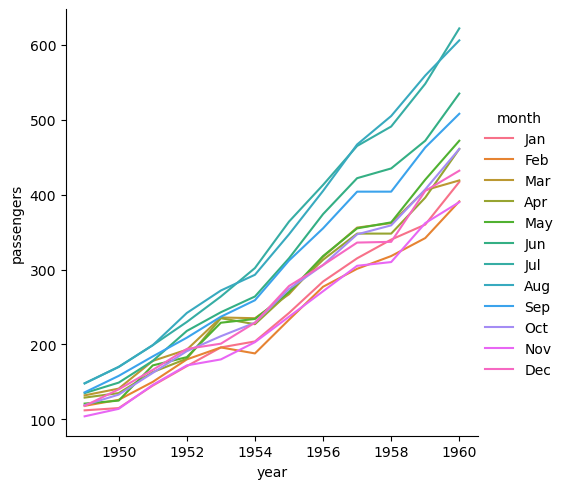

In [5]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

long-form의 데이터의 장점은 플롯을 이렇게 명시적으로 지정하는 데 적합하다는 것입니다.

변수와 관측값을 명확하게 정의할 수 있는 한, 임의의 복잡한 데이터 집합도 수용할 수 있습니다.

그러나 이 형식은 머릿속에 있는 데이터 모델과 다른 경우가 많기 때문에 익숙해지는 데 다소 시간이 걸립니다.

### Wide-form data

간단한 데이터 집합의 경우, 열과 행에 다양한 변수의 수준이 포함되어 있는 스프레드시트에서 볼 수 있는 방식으로 데이터를 생각하는 것이 더 직관적인 경우가 많습니다.

예를 들어, 항공편 데이터 집합을 '피벗'하여 각 열이 수년에 걸친 월별 시계열을 갖도록 함으로써 와이드 폼 조직으로 변환할 수 있습니다:

In [3]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [7]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


여기에는 동일한 세 개의 변수가 있지만 구성이 다르게 되어 있습니다.

이 데이터 집합의 변수는 명명된 필드가 아니라 테이블의 차원에 연결됩니다.

각 관측값은 테이블의 셀에 있는 값과 행 및 열 인덱스에 대한 해당 셀의 좌표 모두로 정의됩니다.

긴 형식의 데이터에서는 데이터 집합의 변수에 이름으로 액세스할 수 있습니다. 와이드 폼 데이터는 그렇지 않습니다.

그럼에도 불구하고 테이블의 차원과 데이터 집합의 변수 간에 명확한 연관성이 있기 때문에 seaborn은 플롯에서 해당 변수에 역할을 할당할 수 있습니다.


- **주의** : Seaborn은 데이터에 대한 argument가 x나 y가 지정되지 않은 경우 와이드 형식으로 처리합니다.

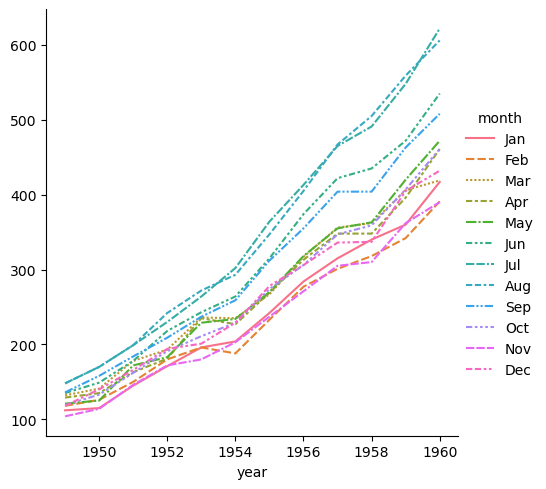

In [5]:
sns.relplot(data=flights_wide, kind="line")

이 플롯은 이전 플롯과 매우 유사합니다. Seaborn은 데이터 프레임의 인덱스를 x에, 데이터 프레임의 값을 y에 할당하고 각 월에 대해 별도의 선을 그렸습니다.

그러나 두 플롯 사이에는 눈에 띄는 차이가 있습니다. 데이터 집합을 롱폼에서 와이드폼으로 변환하는 '피벗' 작업을 거쳤을 때 값의 의미에 대한 정보가 손실되었습니다. **그 결과, Y축 레이블이 없습니다.**

지금까지 와이드 폼 데이터를 사용하면서 훨씬 적은 타이핑을 하고도 거의 동일한 플롯을 만들었습니다. 이게 더 쉬워 보입니다!

하지만 **롱폼 데이터의 큰 장점은 올바른 형식의 데이터를 확보하면 더 이상 데이터의 구조에 대해 생각할 필요가 없다**는 것입니다. 그 안에 포함된 변수만 생각하면서 플롯을 디자인할 수 있습니다. 예를 들어, 연도별 월별 시계열을 나타내는 선을 그리려면 변수를 다시 할당하기만 하면 됩니다:

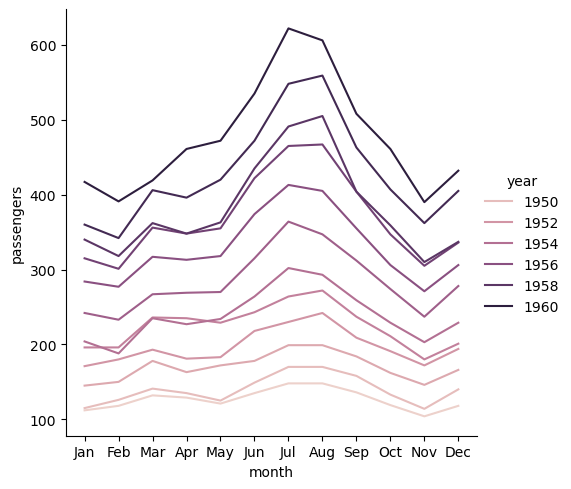

In [4]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

와이드 폼 데이터 집합으로 동일한 리매핑을 수행하려면 테이블을 transpose()해줘야 합니다:

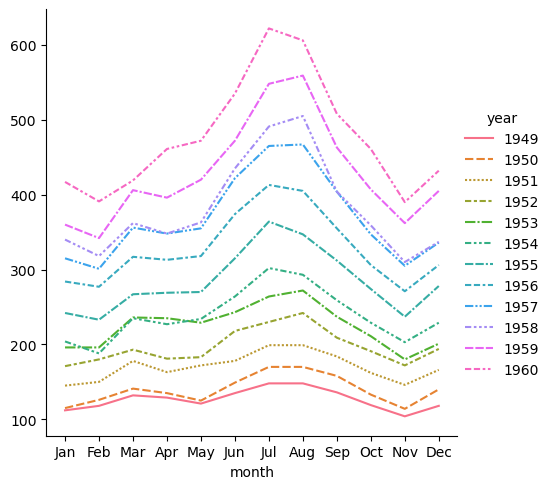

In [9]:
sns.relplot(data=flights_wide.T, kind="line")

(이 예는 또 다른 문제점을 보여주는데, 현재 seaborn은 와이드 폼 데이터 집합의 열 변수를 데이터 유형에 관계없이 범주형으로 간주하는 반면, 롱 폼 변수는 숫자이므로 수량 색상표와 범례가 할당된다는 점입니다. 이는 향후 변경될 수 있습니다.)

명시적인 변수 할당이 없다는 것은 각 플롯 유형이 와이드폼 데이터의 차원과 플롯의 역할 간에 고정된 매핑을 정의해야 한다는 의미이기도 합니다. 이러한 자연스러운 매핑은 플롯 유형에 따라 다를 수 있으므로 **와이드 폼 데이터를 사용할 때 결과를 예측하기 어렵습니다.** 예를 들어 범주형 플롯은 테이블의 열 차원을 x로 지정한 다음 인덱스를 무시하고 행에 걸쳐 집계합니다:

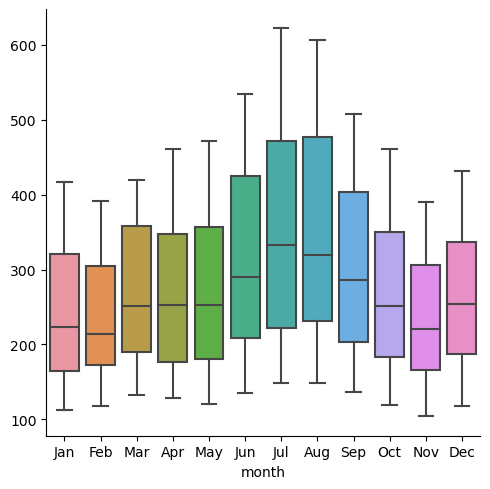

In [10]:
sns.catplot(data=flights_wide, kind="box")

pandas를 사용하여 와이드 폼 데이터를 표현할 때는 변수가 몇 개(3개 이하)로만 제한됩니다. 이는 seaborn이 다중 인덱스 정보를 사용하지 않기 때문인데, 이는 pandas가 추가 변수를 표 형식으로 표현하는 방식입니다. xarray 프로젝트는 레이블이 지정된 N차원 배열 객체를 제공하며, 이는 와이드 폼 데이터를 더 높은 차원으로 일반화한 것으로 간주할 수 있습니다. 현재 seaborn은 xarray의 객체를 직접 지원하지는 않지만, to_pandas 메서드를 사용하여 긴 형식의 pandas.DataFrame으로 변환한 다음 다른 긴 형식의 데이터 세트와 마찬가지로 seaborn에서 플로팅할 수 있습니다.

요약하면, 롱폼 데이터 집합과 와이드폼 데이터 집합은 다음과 같은 모양으로 생각할 수 있습니다:
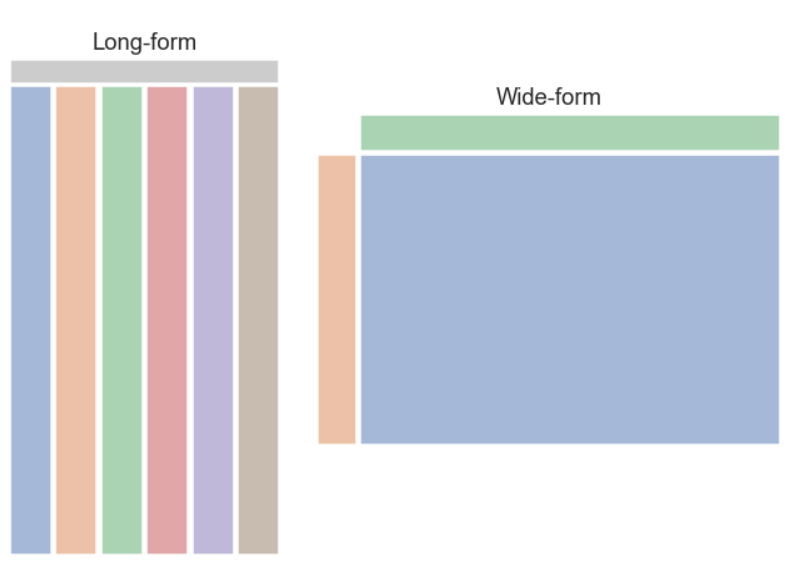